# 1. Intro - Mem0 (MEM-Zero) 

mem0 gives LLM persistant, contextual memory. This layer combines LLM with the vector based storage. LLMs extract and process key information from conversations, while the vector storage enables efficient semantic search and retrieval of memories. This architecture helps AI agents connect past interactions with current context for more relevant responses.

**Key Features**
1. **Memory Processing:** Uses LLMs to automatically extract and store important information from conversations while maintaining full context
2. **Memory Management:** Continuously updates and resolves contradictions in stored information to maintain accuracy
3. **Dual Storage Architecture:** Combines vector database for memory storage and graph database for relationship tracking
4. **Smart Retrieval System:** Employs semantic search and graph queries to find relevant memories based on importance and recency
5. **Simple API Integration:** Provides easy-to-use endpoints for adding (add) and retrieving (search) memories

Use cases- Customer Support, Personal AI Tutors, Health Care Applicaitons, Personalized AI Assistants.

1. Install Mem0 Open Source

    ```python
    pip install mem0ai
    ```

2. Add Memories

    2.1 Instantiate Client

    ```python
        from mem0 import Memory
        m = Memory()
    ```

    2.2 Add Memories

    ```python
        # For a user
        result = m.add("I like to drink coffee in the morning and go for a walk.", user_id="alice",
        metadata={"category": "preferences"})
    ```

3. Retireve Memories

    ```python
        related_memories = m.search("Should I drink coffee or tea?", user_id="alice")
    ```

## Core Concepts



### A. Memory Types

AI systems need memory for three key purposes:

1. Maintaining context during conversations.
2. Learning from past interactions.
3. Building personalized experiences over time.

Without proper memory systems. AI applications would treat each interaction as completely new, losing valuable context and personalization oppurtunities.

#### 1. Short-Term Memory

The most basic form of memory is AI systems holds immediatte context- like a person remembering what was just said in a conversation. This includes:

- **Conversation History:** Recent messages and their order.
- **Working Memory:** Temporary variables and state.
- **Attention Context:** Current focus of the conversation.


#### 2. Long-Term Memory


More sophisticated AI applications implement long-term memory to retian information accross conversations. This includes:

- **Factual Memory:** Stored Knowledge about users, preferences and domain-specific information.
- **Episodic Memory:** Past interactions and experiences.
- **Semantic Memory:** Understanding of concepts and their relationships.

**How Mem0 Implements Long-Term Memory**

Mem0’s long-term memory system builds on these foundations by:

- Using vector embeddings to store and retrieve semantic information
- Maintaining user-specific context across sessions
- Implementing efficient retrieval mechanisms for relevant past interactions

### B. Memory Operations

Mem0 provides two core operations for managing memories in AI applications using endpoints for interactions:

1. Add new memories. The `add` endpoint for ingesting conversations and storing them as memories
2. Search existing onces. The `search` endpoint for retrieving relevant memories based on queries

#### 1. Adding Memories

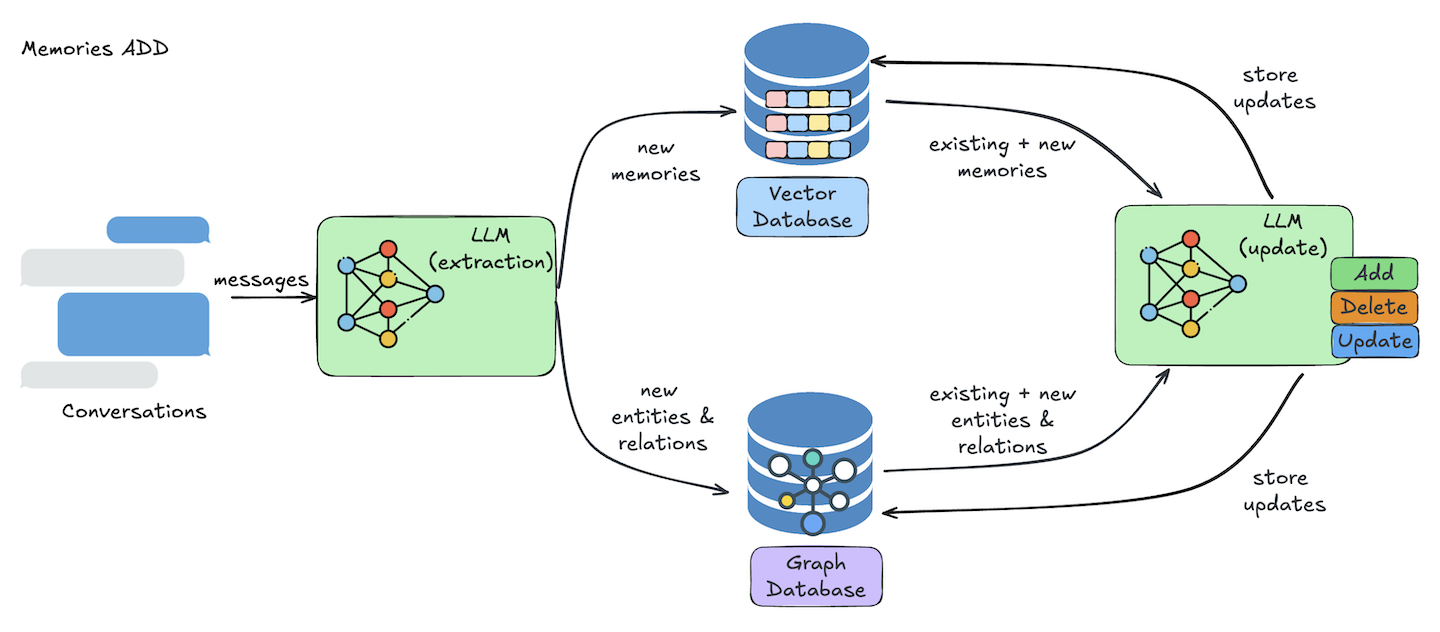

The add operation processes conversations through several steps:

a. Information Extraction

- An LLM extracts relevant memories from the conversation
- It identifies important entities and their relationships

b. Conflict Resolution

- The system compares new information with existing data
- It identifies and resolves any contradictions

c. Memory Storage

- Vector database stores the actual memories
- Graph database maintains relationship information
- Information is continuously updated with each interaction

#### 2.Searching Memories

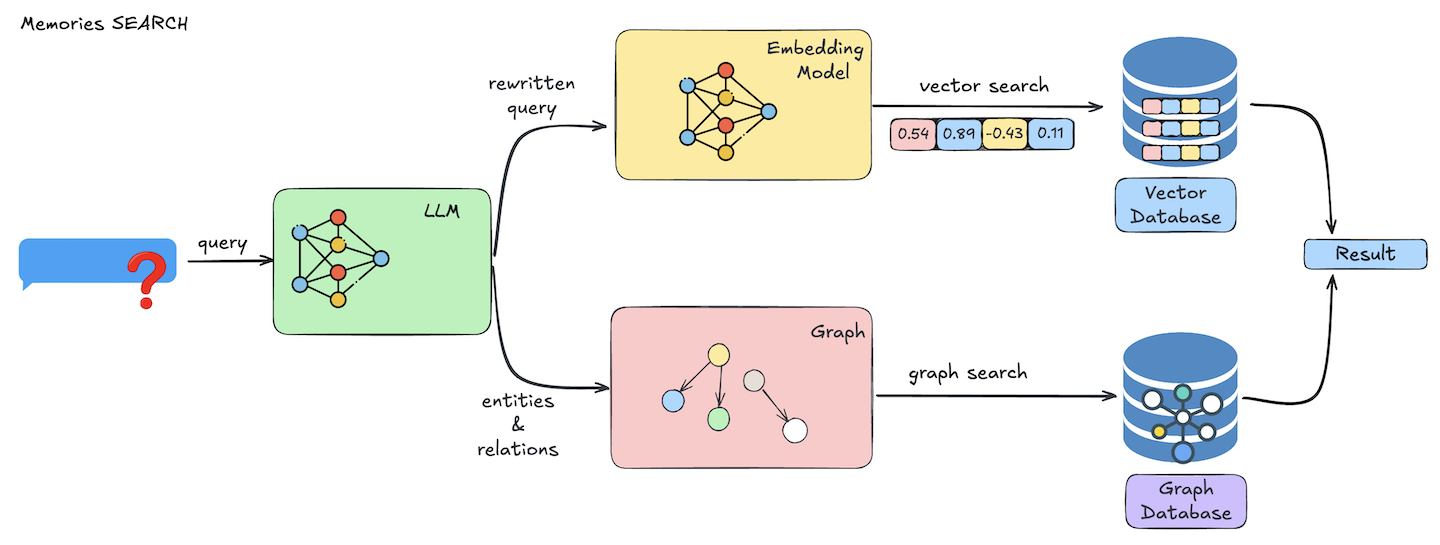

The search operation retrieves memories through a multi-step process:

a. Query Processing

- LLM processes and optimizes the search query
- System prepares filters for targeted search

b. Vector Search

- Performs semantic search using the optimized query
- Ranks results by relevance to the query
- Applies specified filters (user, agent, metadata, etc.)

c. Result Processing

- Combines and ranks the search results
- Returns memories with relevance scores
- Includes associated metadata and timestamps

This semantic search approach ensures accurate memory retrieval, whether you’re looking for specific information or exploring related concepts.

# 2. Python SDK

## 2.1 Initialize Mem0

In [1]:
#--------------------------------------
#       BASIC 
#--------------------------------------

import os
from mem0 import Memory

config = {
    "llm": {
        "provider": "gemini",
        "config": {
            "model": "gemini-2.0-flash",
            "temperature": 0.2,
            "max_tokens": 2000,
        }
    },
    "embedder": {
        "provider": "gemini",
        "config": {
            "model": "models/text-embedding-004",
        }
    },
    "vector_store": {
        "provider": "chroma",
        "config": {
            "collection_name": "test",
            "path": "db",
        }
    }

}

m = Memory.from_config(config)






#### Store a Memory

In [16]:

messages = [
    {"role": "user", "content": "I'm planning to watch a movie tonight. Any recommendations?"},
    {"role": "assistant", "content": "How about a thriller movies? They can be quite engaging."},
    {"role": "user", "content": "I’m not a big fan of thriller movies but I love sci-fi movies."},
    {"role": "assistant", "content": "Got it! I'll avoid thriller recommendations and suggest sci-fi movies in the future."}
]
m.add(messages, user_id="alice", metadata={"category": "movies"})

{'results': [{'id': '6b9fd80a-b0d4-498b-ac96-e082e2e3f227',
   'memory': 'Not a big fan of thriller movies',
   'event': 'ADD'},
  {'id': '46a7aeee-b845-4bd7-9c44-2a388e143dbc',
   'memory': 'Loves sci-fi movies',
   'event': 'ADD'}]}

####  Retrieve Memories

In [24]:
all_memories = m.get_all(user_id='alice')
all_memories

{'results': []}

In [19]:
# Get a single memory by ID
ID=all_memories['results'][-1]['id']
specific_memory = m.get(ID)
specific_memory

{'id': '46a7aeee-b845-4bd7-9c44-2a388e143dbc',
 'memory': 'Loves sci-fi movies',
 'hash': '1110b1af77367917ea2022355a16f187',
 'metadata': {'category': 'movies'},
 'created_at': '2025-03-31T07:12:30.591481-07:00',
 'updated_at': None,
 'user_id': 'alice'}

#### Search Memories

In [20]:
related_memories = m.search(query="What do you know about me?", user_id="alice")
related_memories

{'results': [{'id': '46a7aeee-b845-4bd7-9c44-2a388e143dbc',
   'memory': 'Loves sci-fi movies',
   'hash': '1110b1af77367917ea2022355a16f187',
   'metadata': {'category': 'movies'},
   'score': 1.2076397759329234,
   'created_at': '2025-03-31T07:12:30.591481-07:00',
   'updated_at': None,
   'user_id': 'alice'},
  {'id': '6b9fd80a-b0d4-498b-ac96-e082e2e3f227',
   'memory': 'Not a big fan of thriller movies',
   'hash': '028dfab4483f28980e292f62578d3293',
   'metadata': {'category': 'movies'},
   'score': 1.3967989477833687,
   'created_at': '2025-03-31T07:12:30.564649-07:00',
   'updated_at': None,
   'user_id': 'alice'}]}

#### Update a Memory

In [21]:
result = m.update(memory_id=ID, data="I love India, it is my favorite country.")
result

{'message': 'Memory updated successfully!'}

#### Memory History

In [22]:
history = m.history(memory_id=ID)
history

[{'id': 'b6917a4e-2fa9-4841-9c9f-d80658d9cc72',
  'memory_id': '46a7aeee-b845-4bd7-9c44-2a388e143dbc',
  'old_memory': None,
  'new_memory': 'Loves sci-fi movies',
  'event': 'ADD',
  'created_at': '2025-03-31T07:12:30.591481-07:00',
  'updated_at': None},
 {'id': '397018eb-d253-4c67-9169-feb119da4d52',
  'memory_id': '46a7aeee-b845-4bd7-9c44-2a388e143dbc',
  'old_memory': 'Loves sci-fi movies',
  'new_memory': 'I love India, it is my favorite country.',
  'event': 'UPDATE',
  'created_at': '2025-03-31T07:12:30.591481-07:00',
  'updated_at': '2025-03-31T07:13:34.945313-07:00'}]

#### Delete Memory

In [23]:
# Delete a memory by id
m.delete(memory_id=ID)
# Delete all memories for a user
m.delete_all(user_id="alice")

{'message': 'Memories deleted successfully!'}

#### Reset Memory

In [ ]:
m.reset() # Reset all memories

LLM

In [ ]:
from openai import OpenAI
import os

client = OpenAI(
    api_key=os.environ.get("GEMINI_API_KEY"),
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)


completion = client.beta.chat.completions.parse(
        model="gemini-2.0-flash",
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant with telling Jokes.",
            },
            {"role": "user", "content": "What can you do?"},
        ],
        # response_format=True,
    )

message = completion.choices[0].message.content
print(message)   



I can tell jokes, answer questions, and generate text! I can also help you brainstorm ideas, write different kinds of creative content, and translate languages. How can I help you today?

In fact, since you asked... here's a joke:

Why don't scientists trust atoms?

Because they make up everything!



In [4]:
from openai import OpenAI
import os
import logfire


logfire.configure(token="pylf_v1_us_6jStfQVb5DLKrQ3ZG3JtQZKNY3jXpJ1mNhrsqrfWvmwB",)

client = OpenAI(
    api_key=os.environ.get("GEMINI_API_KEY"),
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)
logfire.instrument_openai(client)  

completion = client.beta.chat.completions.parse(
        model="gemini-2.0-flash",
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant with telling Jokes.",
            },
            {"role": "user", "content": "Tell me a good car joke?"},
        ],
        # response_format=True,
    )

message = completion.choices[0].message.content
print(message)   



08:09:27.120 Chat Completion with 'gemini-2.0-flash' [LLM]
Why did the bicycle fall over? 

Because it was two TIRED! 

Want to hear another one?



Logfire project URL: 
https://logfire-us.pydantic.dev/brotherbhai54/starter-project1


In [ ]:
import openai
import logfire

client = openai.Client()

logfire.configure()
logfire.instrument_openai(client)  

response = client.chat.completions.create(
    model='gpt-4',
    messages=[
        {'role': 'system', 'content': 'You are a helpful assistant.'},
        {'role': 'user', 'content': 'Please write me a limerick about Python logging.'},
    ],
)
print(response.choices[0].message)